In [47]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from ast import literal_eval
from scipy.stats import linregress
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np



# Filtered Dataset
filtered_data = Path("Datasets/filtered_data.csv")
filtered_df = pd.read_csv(filtered_data)
filtered_df.head(50)

,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,"['Comedy', ' Drama', ' Romance']",PG-13,['Garry Marshall']
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,"['Animation', ' Action', ' Adventure']",PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
2,Transformers: Age of Extinction,5.9,7359,"['di Bonaventura Pictures', 'Tom DeSanto/Don M...",1104054072,2014.0,5.6,326960.0,245440000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Michael Bay']
3,Transformers: The Last Knight,6.1,5548,"['Paramount', 'di Bonaventura Pictures', 'Ian ...",605425157,2017.0,5.2,164230.0,130170000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Michael Bay']
4,Guardians of the Galaxy Vol. 2,7.6,19898,['Marvel Studios'],863756051,2017.0,7.6,736895.0,389810000.0,"['Action', ' Adventure', ' Comedy']",PG-13,['James Gunn']
5,Hidden Figures,8.1,8699,"['Fox 2000 Pictures', 'Levantine Films', 'Cher...",235956898,2016.0,7.8,246392.0,169610000.0,"['Biography', ' Drama', ' History']",PG,['Theodore Melfi']
6,Avengers: Infinity War,8.3,27040,['Marvel Studios'],2052415039,2018.0,8.4,1157990.0,678820000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,"['Anthony Russo', 'Joe Russo']"
7,Fast & Furious Presents: Hobbs & Shaw,6.9,6428,"['Chris Morgan Productions', 'Seven Bucks Prod...",760098996,2019.0,6.5,228675.0,173960000.0,"['Action', ' Adventure', ' Thriller']",PG-13,['David Leitch']
8,The Amazing Spider-Man 2,6.5,12057,"['Marvel Entertainment', 'Columbia Pictures', ...",708962323,2014.0,6.6,523409.0,202850000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Marc Webb']
9,Me Before You,7.9,11180,"['New Line Cinema', 'Sunswept Entertainment', ...",207945075,2016.0,7.4,275086.0,56250000.0,"['Drama', ' Romance']",PG-13,['Thea Sharrock']


In [48]:
# build DataFrame with relevant info
genre = filtered_df["Genre"]
movie_rating = filtered_df["Movie Rating"]
movie_name = filtered_df["Movie Name"]
average_ratings_by_genre = pd.DataFrame({"Movie Name": movie_name, "Genre":genre, "Movie Rating":movie_rating}
                                       )
    
average_ratings_by_genre


,Movie Name,Genre,Movie Rating
0,Mother's Day,"['Comedy', ' Drama', ' Romance']",5.6
1,Spider-Man: Into the Spider-Verse,"['Animation', ' Action', ' Adventure']",8.4
2,Transformers: Age of Extinction,"['Action', ' Adventure', ' Sci-Fi']",5.6
3,Transformers: The Last Knight,"['Action', ' Adventure', ' Sci-Fi']",5.2
4,Guardians of the Galaxy Vol. 2,"['Action', ' Adventure', ' Comedy']",7.6
...,...,...,...
1379,The Butler,"['Biography', ' Drama']",7.2
1380,High-Rise,"['Drama', ' Sci-Fi']",5.5
1381,The Birth of a Nation,"['Biography', ' Drama', ' History']",6.5
1382,Little Boy,"['Drama', ' History', ' War']",7.3


In [49]:
# split genres in to single values
filtered_df['Genre'] = filtered_df['Genre'].apply(literal_eval)

split_data = filtered_df.explode('Genre')


split_data.head()

,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Comedy,PG-13,['Garry Marshall']
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Drama,PG-13,['Garry Marshall']
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Romance,PG-13,['Garry Marshall']
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Animation,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Action,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."


In [50]:
split_data.head()


,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Comedy,PG-13,['Garry Marshall']
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Drama,PG-13,['Garry Marshall']
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Romance,PG-13,['Garry Marshall']
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Animation,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Action,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."


In [51]:
# drop null values
split_data= split_data.dropna()


In [52]:
# find max rating
max_rating = max(split_data["Movie Rating"])
max_rating


8.8

In [53]:
# max rated name
highest_rated_movie = split_data.loc[split_data['Movie Rating'].idxmax()]['Movie Name']
highest_rated_movie



50    Inception
50    Inception
50    Inception
Name: Movie Name, dtype: object

In [54]:
# find min rating
min_rating = min(split_data["Movie Rating"])
min_rating

4.9

In [55]:
# min movie name
lowest_rated_movie = split_data.loc[split_data['Movie Rating'].idxmin()]['Movie Name']
lowest_rated_movie

159    The Twilight Saga: Breaking Dawn - Part 1
159    The Twilight Saga: Breaking Dawn - Part 1
159    The Twilight Saga: Breaking Dawn - Part 1
Name: Movie Name, dtype: object

In [56]:
# ratings value counts
movie_values = filtered_df['Movie Rating'].value_counts()
movie_values

Movie Rating
6.4    78
6.3    73
6.6    73
6.2    70
6.5    64
7.1    63
6.7    62
7.3    59
6.8    56
7.0    53
7.2    51
6.9    50
6.1    48
5.6    47
5.7    41
7.5    41
7.4    40
5.8    39
5.9    39
6.0    37
7.8    35
7.6    34
7.7    30
5.4    25
5.5    25
8.1    21
7.9    21
5.3    20
5.2    19
8.0    17
5.1    12
4.9    10
8.4     8
5.0     8
8.2     5
8.3     4
8.5     4
8.7     1
8.8     1
Name: count, dtype: int64

In [57]:
total_votes_per_genre = split_data.groupby('Genre')['Vote Count'].sum()
total_votes_per_genre

Genre
 Action        160835
 Adventure    1907903
 Biography      80370
 Comedy        985943
 Crime         564142
 Drama        1569353
 Family        231048
 Fantasy       646051
 History       139348
 Horror        281054
 Music         116313
 Musical        23433
 Mystery       520774
 Romance       483836
 Sci-Fi       1114391
 Sport          34701
 Thriller      971561
 War            61314
 Western        42518
Action        2494256
Adventure      403350
Animation      548907
Biography      362329
Comedy         641996
Crime          199259
Drama          723125
Fantasy          8254
Horror         237503
Mystery         24223
Sci-Fi           9719
Thriller          320
Name: Vote Count, dtype: int64

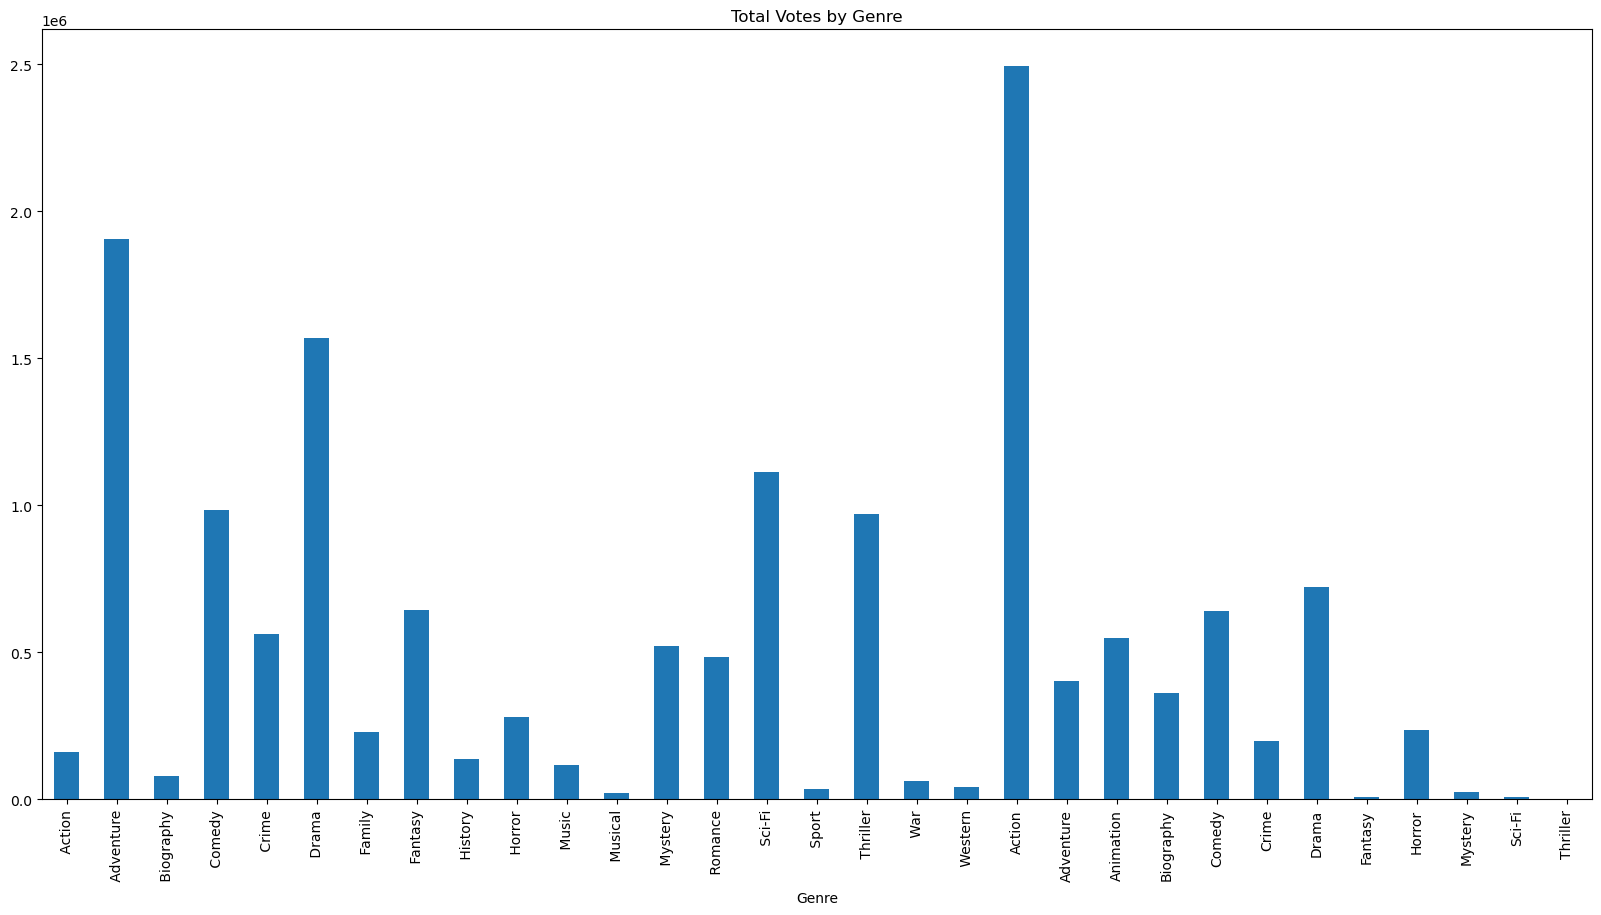

<Figure size 640x480 with 0 Axes>

In [58]:
total_votes_per_genre.plot(kind="bar", figsize=(20,10
                                               ), title = "Total Votes by Genre")


plt.show()
plt.tight_layout()

In [59]:
# describe dataset 
filtered_df["Movie Rating"].describe()

count    1384.000000
mean        6.629046
std         0.775638
min         4.900000
25%         6.100000
50%         6.600000
75%         7.200000
max         8.800000
Name: Movie Rating, dtype: float64

<Axes: >

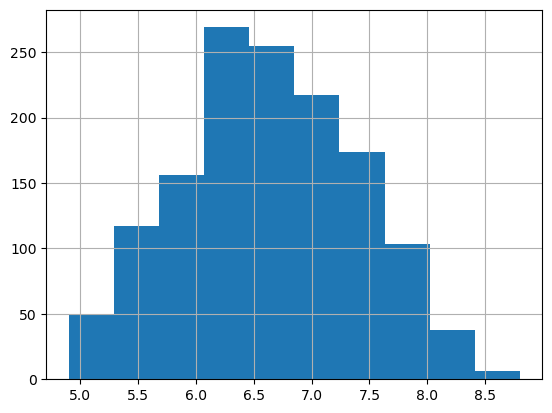

In [60]:
filtered_df["Movie Rating"].hist(bins=10)

<Axes: >

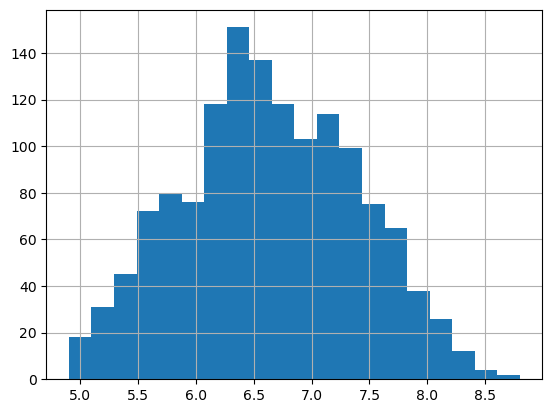

In [61]:
filtered_df["Movie Rating"].hist(bins=20)

In [62]:
# combine data and get rid of random spacing in duplicate columns
split_data['Genre'] = split_data['Genre'].replace({" Action": "Action"})
split_data['Genre'] = split_data['Genre'].replace({" Adventure": "Adventure"})
split_data['Genre'] = split_data['Genre'].replace({" Biography": "Biography"})
split_data['Genre'] = split_data['Genre'].replace({" Comedy": "Comedy"})
split_data['Genre'] = split_data['Genre'].replace({" Crime": "Crime"})
split_data['Genre'] = split_data['Genre'].replace({" Drama": "Drama"})
split_data['Genre'] = split_data['Genre'].replace({" Family": "Family"})
split_data['Genre'] = split_data['Genre'].replace({" Fantasy": "Fantasy"})
split_data['Genre'] = split_data['Genre'].replace({" History": "History"})
split_data['Genre'] = split_data['Genre'].replace({" Horror": "Horror"})
split_data['Genre'] = split_data['Genre'].replace({" Music": "Music"})
split_data['Genre'] = split_data['Genre'].replace({" Musical": "Musical"})
split_data['Genre'] = split_data['Genre'].replace({" Mystery": "Mystery"})
split_data['Genre'] = split_data['Genre'].replace({" Romance": "Romance"})
split_data['Genre'] = split_data['Genre'].replace({" Sci-Fi": "Sci-Fi"})
split_data['Genre'] = split_data['Genre'].replace({" Sport": "Sport"})
split_data['Genre'] = split_data['Genre'].replace({" Thriller": "Thriller"})
split_data['Genre'] = split_data['Genre'].replace({" War": "War"})
split_data['Genre'] = split_data['Genre'].replace({" Western": "Western"})


In [63]:
# avg ratings by genre
avg_ratings_by_genre = split_data.groupby('Genre')['Movie Rating'].mean()
split_data.head(50)



,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Comedy,PG-13,['Garry Marshall']
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Drama,PG-13,['Garry Marshall']
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Romance,PG-13,['Garry Marshall']
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Animation,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Action,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Adventure,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
2,Transformers: Age of Extinction,5.9,7359,"['di Bonaventura Pictures', 'Tom DeSanto/Don M...",1104054072,2014.0,5.6,326960.0,245440000.0,Action,PG-13,['Michael Bay']
2,Transformers: Age of Extinction,5.9,7359,"['di Bonaventura Pictures', 'Tom DeSanto/Don M...",1104054072,2014.0,5.6,326960.0,245440000.0,Adventure,PG-13,['Michael Bay']
2,Transformers: Age of Extinction,5.9,7359,"['di Bonaventura Pictures', 'Tom DeSanto/Don M...",1104054072,2014.0,5.6,326960.0,245440000.0,Sci-Fi,PG-13,['Michael Bay']
3,Transformers: The Last Knight,6.1,5548,"['Paramount', 'di Bonaventura Pictures', 'Ian ...",605425157,2017.0,5.2,164230.0,130170000.0,Action,PG-13,['Michael Bay']


In [66]:
len(avg_ratings_by_genre)

20

In [67]:
# Sort the DataFrame by average rating in descending order
high_avg_ratings_by_genre = avg_ratings_by_genre.sort_values(ascending=False)

# Get the top 5 genres with highest average rating
top_5_genres = high_avg_ratings_by_genre.head()



# Print the top 5 genres
print(top_5_genres)

Genre
War          7.113636
Biography    7.103008
Sport        6.966667
History      6.937500
Western      6.877778
Name: Movie Rating, dtype: float64


In [68]:
low_avg_ratings_by_genre = avg_ratings_by_genre.sort_values(ascending=True)

bottom_5_genres = low_avg_ratings_by_genre.head()

print(bottom_5_genres)

Genre
Horror      6.167273
Fantasy     6.290152
Thriller    6.497992
Comedy      6.501728
Mystery     6.503472
Name: Movie Rating, dtype: float64


In [69]:
# count total numbers of movies per genre using for loop

genre_movie_counts = {}

for index, row in split_data.iterrows():
    movie_genre = row['Genre']

    if movie_genre not in genre_movie_counts:
        genre_movie_counts[movie_genre] = 0
    genre_movie_counts[movie_genre] += 1
    
    

for genre, movie_count in genre_movie_counts.items():
    print(f"Genre: {genre}, Movie Count: {movie_count}")
    
 

Genre: Comedy, Movie Count: 463
Genre: Drama, Movie Count: 712
Genre: Romance, Movie Count: 180
Genre: Animation, Movie Count: 121
Genre: Action, Movie Count: 498
Genre: Adventure, Movie Count: 375
Genre: Sci-Fi, Movie Count: 130
Genre: Biography, Movie Count: 133
Genre: History, Movie Count: 56
Genre: Thriller, Movie Count: 249
Genre: Crime, Movie Count: 228
Genre: Horror, Movie Count: 165
Genre: Mystery, Movie Count: 144
Genre: Family, Movie Count: 61
Genre: Fantasy, Movie Count: 132
Genre: Western, Movie Count: 9
Genre: Sport, Movie Count: 15
Genre: War, Movie Count: 22
Genre: Music, Movie Count: 31
Genre: Musical, Movie Count: 7


In [70]:
genre_data = """Genre: Comedy, Movie Count: 463
Genre: Drama, Movie Count: 712
Genre: Romance, Movie Count: 180
Genre: Animation, Movie Count: 121
Genre: Action, Movie Count: 498
Genre: Adventure, Movie Count: 375
Genre: Sci-Fi, Movie Count: 130
Genre: Biography, Movie Count: 133
Genre: History, Movie Count: 56
Genre: Thriller, Movie Count: 249
Genre: Crime, Movie Count: 228
Genre: Horror, Movie Count: 165
Genre: Mystery, Movie Count: 144
Genre: Family, Movie Count: 61
Genre: Fantasy, Movie Count: 132
Genre: Western, Movie Count: 9
Genre: Sport, Movie Count: 15
Genre: War, Movie Count: 22
Genre: Music, Movie Count: 31
Genre: Musical, Movie Count: 7"""

# Split the data into individual lines
lines = genre_data.split("\n")

# Initialize variables to track min and max movie counts
min_movie_count = float('inf')
max_movie_count = -float('inf')

# Iterate through each line and extract movie count
for line in lines:
    movie_count = int(line.split(": ")[-1])

    if movie_count < min_movie_count:
        min_movie_count = movie_count

    if movie_count > max_movie_count:
        max_movie_count = movie_count

print(f"Minimum Movie Count: {min_movie_count}")
print(f"Maximum Movie Count: {max_movie_count}")




Minimum Movie Count: 7
Maximum Movie Count: 712


/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_90664/3571328799.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(stats_df['Genre'], rotation=45, ha='right')


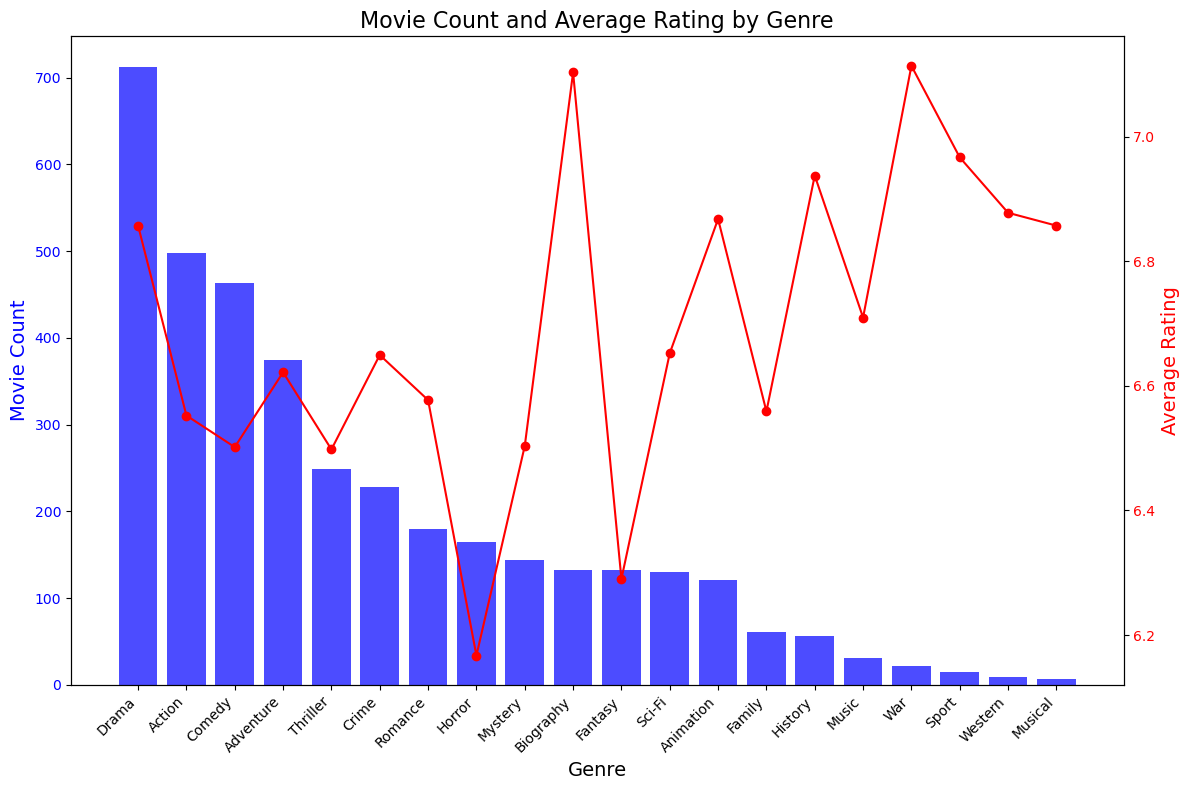

In [71]:


split_data = pd.DataFrame(split_data)

# Sample variables
genres_movie_count = split_data['Genre'].value_counts()
average_ratings_by_genre = split_data.groupby('Genre')['Movie Rating'].mean()

# Create a DataFrame from the variables
stats_df = pd.DataFrame({
    'Movie Count': genres_movie_count,
    'Average Rating': average_ratings_by_genre
    }).reset_index()
# sort values by Average Rating
stats_df = stats_df.sort_values(by="Movie Count", ascending=False)
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot 'Movie Count' on the first y-axis
ax1.bar(stats_df['Genre'], stats_df['Movie Count'], color='b', alpha=0.7, label='Movie Count')
ax1.set_xlabel('Genre', fontsize=14)
ax1.set_ylabel('Movie Count', color='b', fontsize=14)
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for 'Average Rating'
ax2 = ax1.twinx()
ax2.plot(stats_df['Genre'], stats_df['Average Rating'], color='r', marker='o', label='Average Rating')
ax2.set_ylabel('Average Rating', color='r', fontsize=14)
ax2.tick_params(axis='y', labelcolor='r')

# Set labels, title, and ticks
# Set the rotation for genre labels
ax1.set_xticklabels(stats_df['Genre'], rotation=45, ha='right')



# Title and legend
plt.title('Movie Count and Average Rating by Genre', fontsize=16)
fig.tight_layout()

# Show the plot
plt.show()

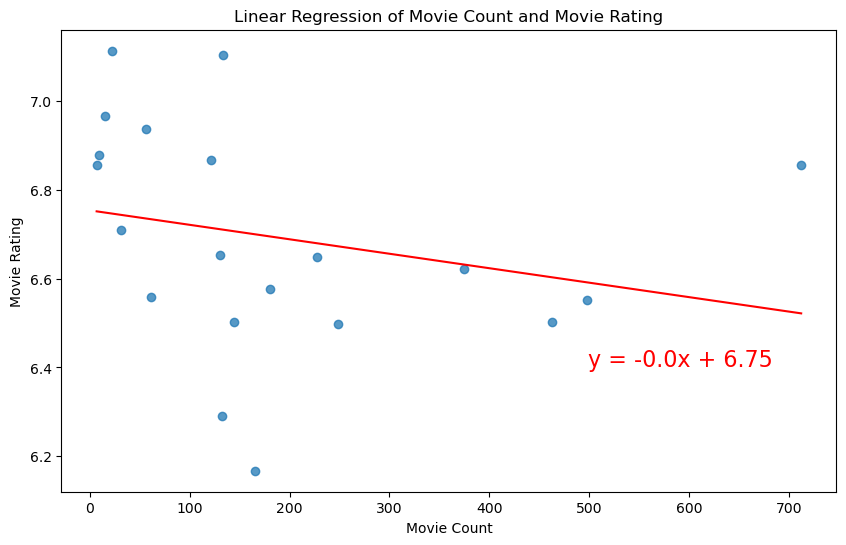

The r-squared is: 0.06019561328941657


In [72]:
# Sample data
movie_count = stats_df["Movie Count"]
movie_rating = stats_df["Average Rating"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(movie_count, movie_rating)
regress_values = movie_count * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with transparency
plt.scatter(movie_count
            , movie_rating, alpha=0.75)

# Regression line
plt.plot(movie_count, regress_values, "r-")

# Annotation
plt.annotate(line_eq, (max(movie_count) * 0.7, max(movie_rating) * 0.9), fontsize=16, color="red")

# Axes labels
plt.xlabel("Movie Count")
plt.ylabel("Movie Rating")
plt.title("Linear Regression of Movie Count and Movie Rating")
# Adjust axes limits if needed
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)

# Show the plot
plt.show()
print(f"The r-squared is: {rvalue**2}")

/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


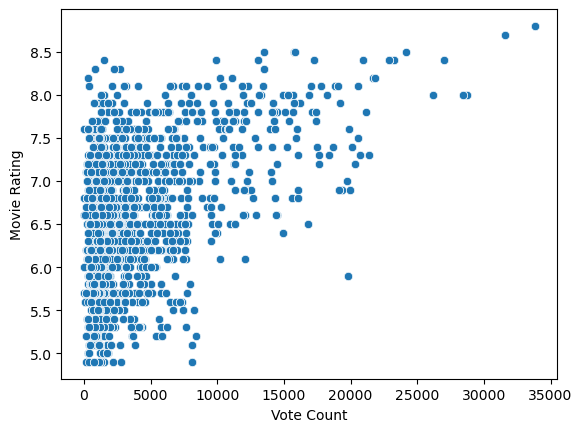

In [73]:
# Example of a scatter plot
sns.scatterplot(x='Vote Count', y='Movie Rating', data=split_data)
plt.show()

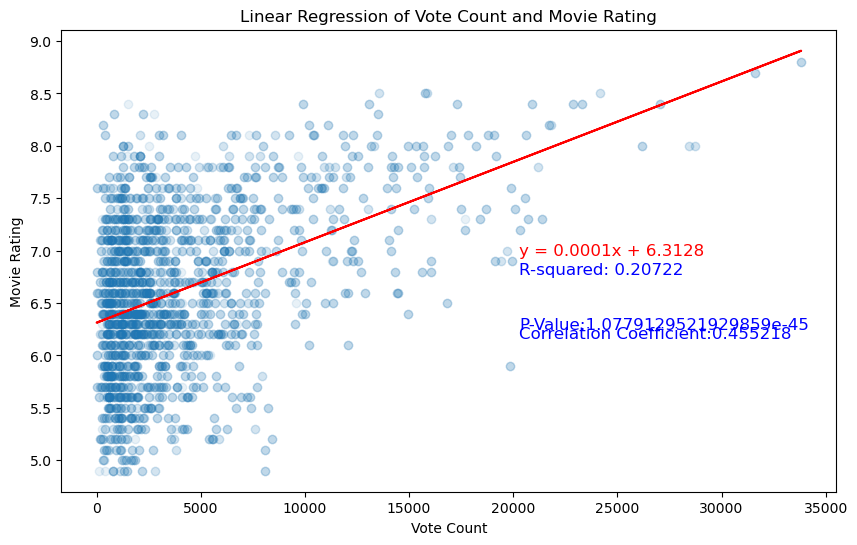

The r-squared is: 0.2072234613735389


In [100]:
# Sample data
votes = split_data["Vote Count"]
movie_rating = split_data["Movie Rating"]
corr = 0.455218
p_value = 1.0779129521929859e-45
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(votes, movie_rating)
regress_values = votes * slope + intercept
line_eq = "y = " + str(round(slope, 4)) + "x + " + str(round(intercept, 4))

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with transparency
plt.scatter(votes, movie_rating, alpha=0.10
           )

# Regression line
plt.plot(votes, regress_values, "r-")

# Annotation
plt.annotate(line_eq, (max(votes) * 0.6, max(movie_rating) * 0.79
                      ), fontsize=12, color="red")
plt.text(max(votes) * 0.6, max(movie_rating) * 0.77, f"R-squared: {rvalue**2:.5f}", fontsize=12, color="blue")
plt.text(max(votes) * 0.6, max(movie_rating) * 0.7, f"Correlation Coefficient:{corr}", 
         fontsize=12, color="blue")
plt.text(max(votes) * 0.6, max(movie_rating) * 0.71, f"P-Value:{p_value}", 
         fontsize=12, color="blue")
# Axes labels
plt.xlabel("Vote Count")
plt.ylabel("Movie Rating")
plt.title("Linear Regression of Vote Count and Movie Rating")
# Adjust axes limits if needed
# plt.xlim(x_min, x_max))
# plt.ylim(5,8)

# Show the plot
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [75]:

split_data = pd.DataFrame(split_data)

# Group by 'Genre' and calculate total votes and average rating
genre_stats = split_data.groupby('Genre').agg({'Vote Count': 'sum', 'Movie Rating': 'mean'}).rename(columns={'Vote Count': 'Total Votes', 'Movie Rating': 'Average Rating'})
genre_stats
# Display the result
print(genre_stats)


           Total Votes  Average Rating
Genre                                 
Action         2655091        6.552410
Adventure      2311253        6.621867
Animation       548907        6.867769
Biography       442699        7.103008
Comedy         1627939        6.501728
Crime           763401        6.649561
Drama          2292478        6.857163
Family          231048        6.559016
Fantasy         654305        6.290152
History         139348        6.937500
Horror          518557        6.167273
Music           116313        6.709677
Musical          23433        6.857143
Mystery         544997        6.503472
Romance         483836        6.577222
Sci-Fi         1124110        6.652308
Sport            34701        6.966667
Thriller        971881        6.497992
War              61314        7.113636
Western          42518        6.877778


/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_90664/2119274681.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(genre_stats.index, rotation=45, ha='right')


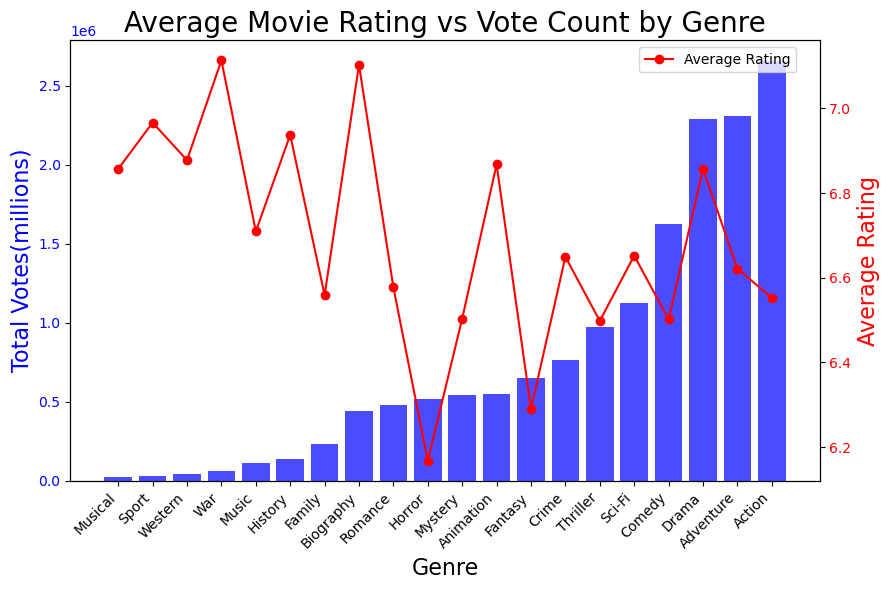

In [76]:
genre_stats = pd.DataFrame({'Genre': ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
    'Total Votes': [2655091, 2311253, 548907, 442699, 1627939, 763401, 2292478, 231048, 654305, 139348, 518557, 116313, 23433, 544997, 483836, 1124110, 34701, 971881, 61314, 42518],
    'Average Rating': [6.552410, 6.621867, 6.867769, 7.103008, 6.501728, 6.649561, 6.857163, 6.559016, 6.290152, 6.937500, 6.167273, 6.709677, 6.857143, 6.503472, 6.577222, 6.652308, 6.966667, 6.497992, 7.113636, 6.877778]
})
# convert Movie Rating to numeric
genre_stats['Average Rating'] = pd.to_numeric(genre_stats['Average Rating'], errors='coerce')

# Sort DataFrame by 'Movie Rating' in descending order
genre_stats = genre_stats.sort_values(by="Total Votes"
                                     )

# Set the 'Genre' column as the index
genre_stats.set_index('Genre', inplace=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plot 'Total Votes' on the first y-axis
ax1.bar(genre_stats.index, genre_stats['Total Votes'], color='b', alpha=0.7, label='Total Votes')
ax1.set_xlabel('Genre', fontsize=16)
ax1.set_ylabel('Total Votes(millions)', color='b', fontsize=16)
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for 'Average Rating'
ax2 = ax1.twinx()
ax2.plot(genre_stats.index, genre_stats['Average Rating'], color='r', marker='o', label='Average Rating')
ax2.set_ylabel('Average Rating', color='r', fontsize=16)
ax2.tick_params(axis='y', labelcolor='r')

# Set the rotation for genre labels
ax1.set_xticklabels(genre_stats.index, rotation=45, ha='right')  

# Title and legend
plt.title('Average Movie Rating vs Vote Count by Genre', fontsize=20)
fig.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(0.75, 1.0))

# Show the plot
plt.show()



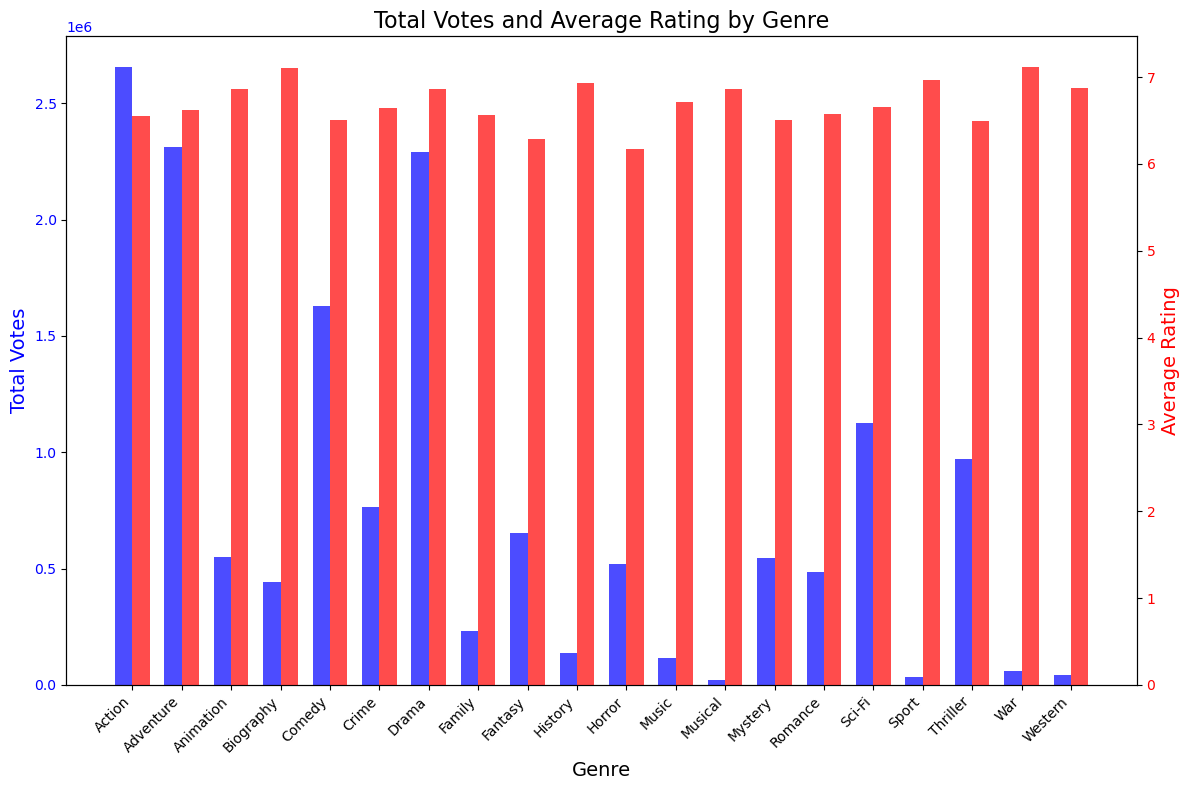

In [77]:

# Assuming genre_stats is your DataFrame
genre_stats = pd.DataFrame({
    'Genre': ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
    'Total Votes': [2655091, 2311253, 548907, 442699, 1627939, 763401, 2292478, 231048, 654305, 139348, 518557, 116313, 23433, 544997, 483836, 1124110, 34701, 971881, 61314, 42518],
    'Average Rating': [6.552410, 6.621867, 6.867769, 7.103008, 6.501728, 6.649561, 6.857163, 6.559016, 6.290152, 6.937500, 6.167273, 6.709677, 6.857143, 6.503472, 6.577222, 6.652308, 6.966667, 6.497992, 7.113636, 6.877778]
})

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

bar_width = 0.35
bar_positions = np.arange(len(genre_stats))

# Plot 'Total Votes' on the first y-axis
ax1.bar(bar_positions - bar_width/2, genre_stats['Total Votes'], bar_width, label='Total Votes', color='b', alpha=0.7)
ax1.set_xlabel('Genre', fontsize=14)
ax1.set_ylabel('Total Votes', color='b', fontsize=14)
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for 'Average Rating'
ax2 = ax1.twinx()
ax2.bar(bar_positions + bar_width/2, genre_stats['Average Rating'], bar_width, label='Average Rating', color='r', alpha=0.7)
ax2.set_ylabel('Average Rating', color='r', fontsize=14)
ax2.tick_params(axis='y', labelcolor='r')

# Set labels, title, and ticks
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(genre_stats['Genre'], rotation=45, ha='right')  # Rotate genre labels for readability

# Title and legend
plt.title('Total Votes and Average Rating by Genre', fontsize=16)
fig.tight_layout()

# Show the plot
plt.show()




/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Movie Rating')

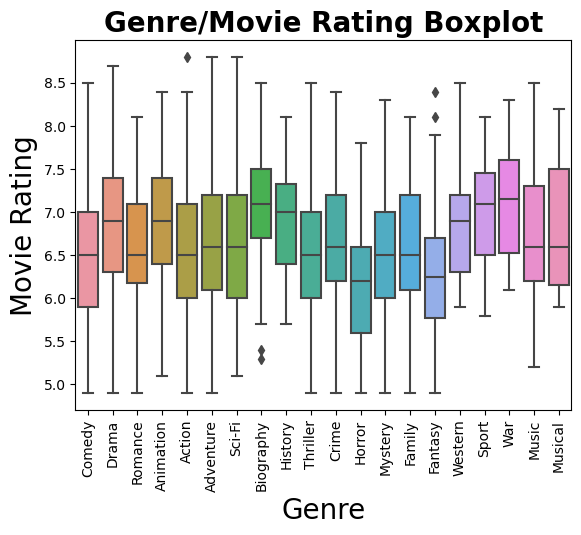

In [78]:
ax = sns.boxplot(x='Genre', y='Movie Rating', data=split_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

ax.set_title("Genre/Movie Rating Boxplot",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
# set x label and y label size and name
ax.set_xlabel('Genre',fontsize = 20, )
ax.set_ylabel('Movie Rating',fontsize = 20 )



# sns.boxplot(x='Genre', y='Movie Rating', data=split_data, rotation=90)

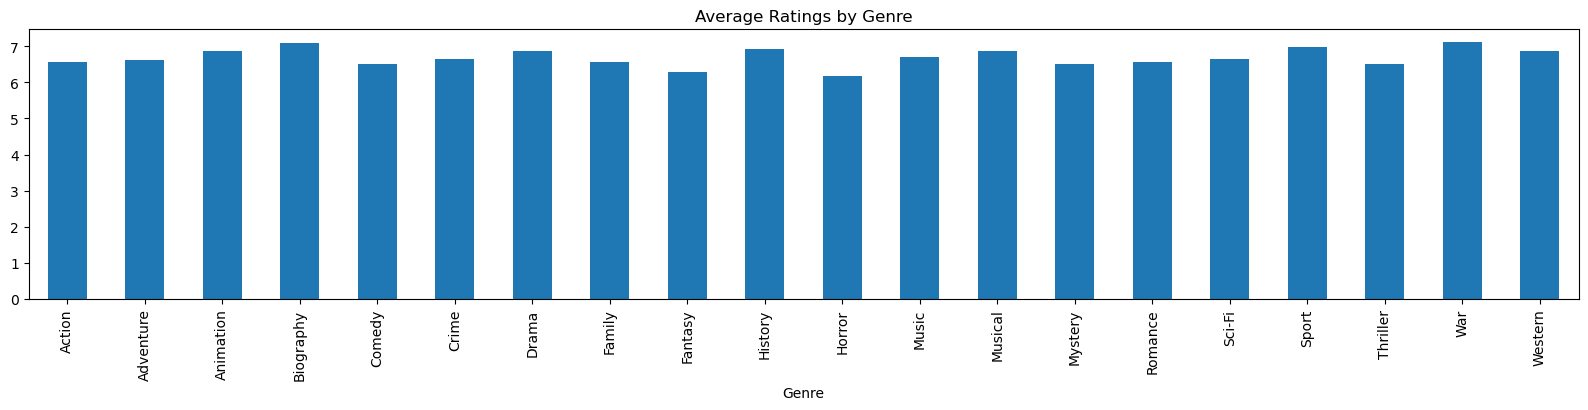

<Figure size 640x480 with 0 Axes>

In [79]:
# Barchart of avg ratings by genre
avg_ratings_by_genre.plot(kind="bar", figsize=(20,3.5), title = "Average Ratings by Genre")


plt.show()


plt.tight_layout()

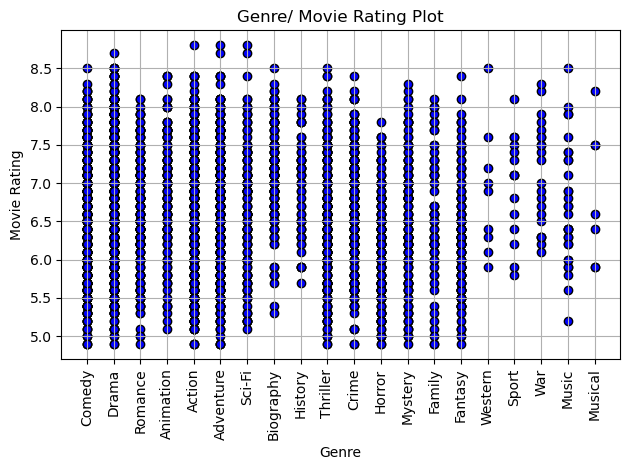

In [80]:
# scatterplot of avg ratings by genre
plt.scatter(split_data["Genre"], split_data["Movie Rating"], marker="o",
            facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Genre")
plt.ylabel("Movie Rating")
plt.title("Genre/ Movie Rating Plot")
plt.xticks(rotation=90)
plt.grid(True) 
plt.tight_layout()


In [81]:
war_ratings = split_data[split_data['Genre'] == 'War']['Movie Rating']
horror_ratings = split_data[split_data['Genre'] == 'Horror']['Movie Rating']

t_stat, p_value = ttest_ind(war_ratings, horror_ratings)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 6.138704620681161, P-value: 4.954487594422939e-09


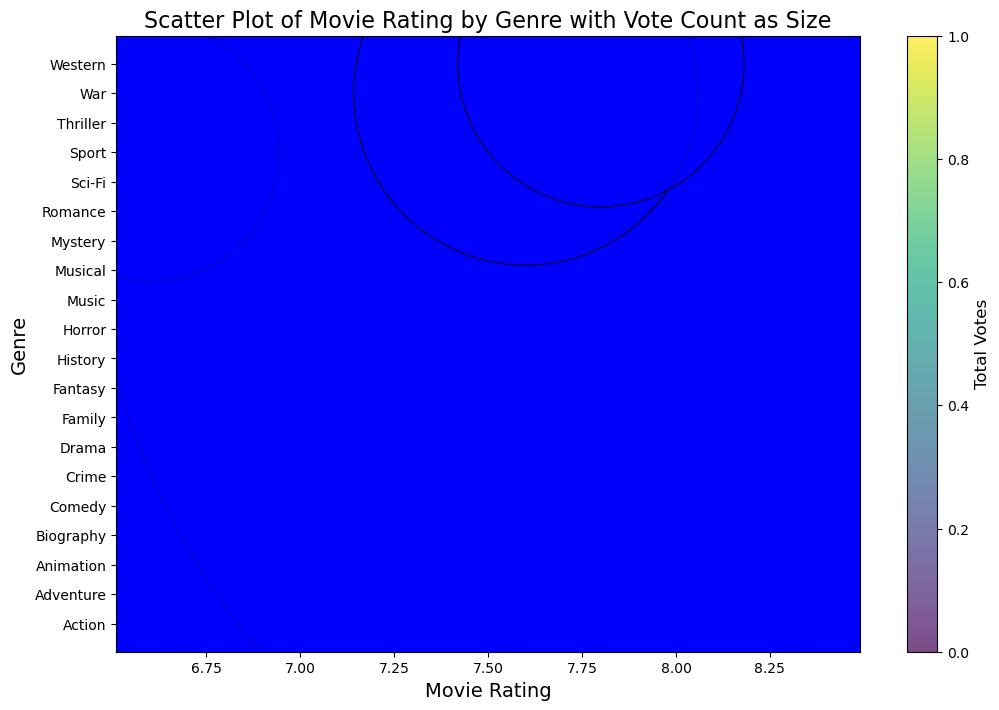

In [82]:
# Assuming genre_stats is your DataFrame
genre_stats = pd.DataFrame({
    'Genre': ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
    'Total Votes': [2655091, 2311253, 548907, 442699, 1627939, 763401, 2292478, 231048, 654305, 139348, 518557, 116313, 23433, 544997, 483836, 1124110, 34701, 971881, 61314, 42518],
    'Average Rating': [6.552410, 6.621867, 6.867769, 7.103008, 6.501728, 6.649561, 6.857163, 6.559016, 6.290152, 6.937500, 6.167273, 6.709677, 6.857143, 6.503472, 6.577222, 6.652308, 6.966667, 6.497992, 7.113636, 6.877778],
    'Movie Rating': [8.1, 7.9, 8.2, 7.6, 7.3, 8.0, 7.9, 6.9, 7.7, 7.6, 6.8, 7.2, 8.0, 7.5, 7.0, 8.4, 6.6, 7.5, 7.6, 7.8],
})

# Plotting scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(genre_stats['Movie Rating'], genre_stats['Genre'], s=genre_stats['Total Votes'], alpha=0.7, c='blue', edgecolors='black', linewidths=1)

# Set labels and title
plt.xlabel('Movie Rating', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Scatter Plot of Movie Rating by Genre with Vote Count as Size', fontsize=16)

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Total Votes', fontsize=12)

# Show the plot
plt.show()




/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

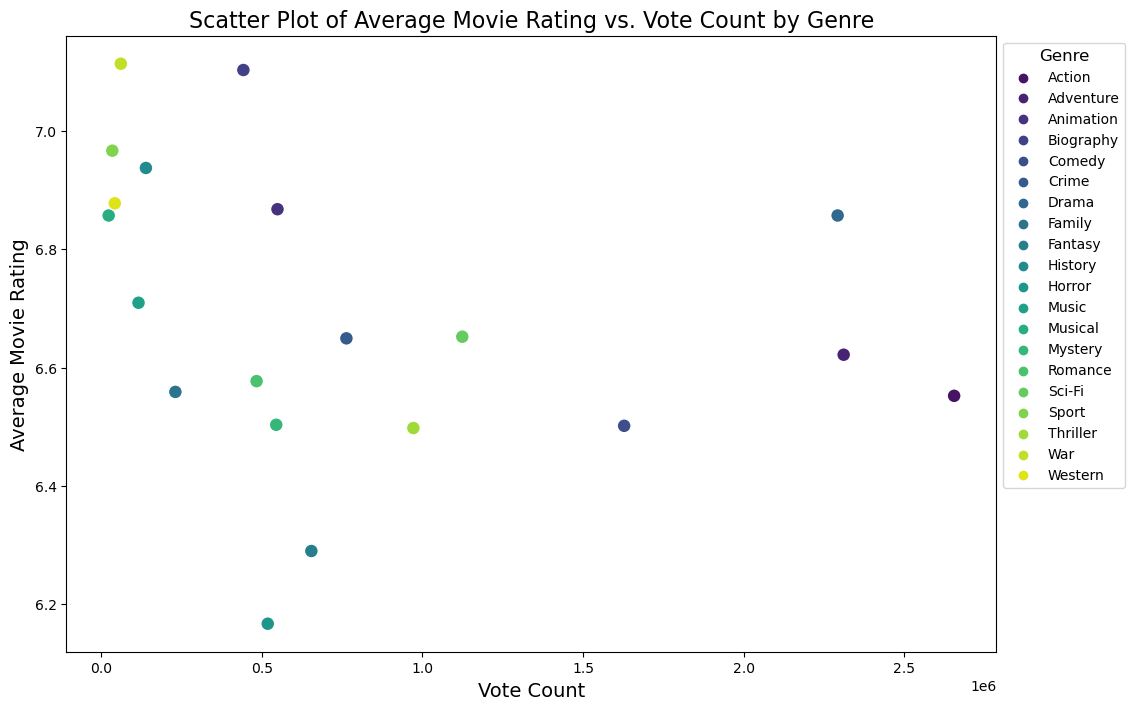

In [83]:

# Assuming genre_stats is your DataFrame
genre_stats = pd.DataFrame({
    'Genre': ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
    'Total Votes': [2655091, 2311253, 548907, 442699, 1627939, 763401, 2292478, 231048, 654305, 139348, 518557, 116313, 23433, 544997, 483836, 1124110, 34701, 971881, 61314, 42518],
    'Average Rating': [6.552410, 6.621867, 6.867769, 7.103008, 6.501728, 6.649561, 6.857163, 6.559016, 6.290152, 6.937500, 6.167273, 6.709677, 6.857143, 6.503472, 6.577222, 6.652308, 6.966667, 6.497992, 7.113636, 6.877778],
    'Movie Rating': [8.1, 7.9, 8.2, 7.6, 7.3, 8.0, 7.9, 6.9, 7.7, 7.6, 6.8, 7.2, 8.0, 7.5, 7.0, 8.4, 6.6, 7.5, 7.6, 7.8],
})

# Set up the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Votes', y='Average Rating', hue='Genre', data=genre_stats, palette='viridis', s=100, edgecolor='w', linewidth=1)

# Set labels and title
plt.xlabel('Vote Count', fontsize=14)
plt.ylabel('Average Movie Rating', fontsize=14)
plt.title('Scatter Plot of Average Movie Rating vs. Vote Count by Genre', fontsize=16)

# Add legend
plt.legend(title='Genre', title_fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

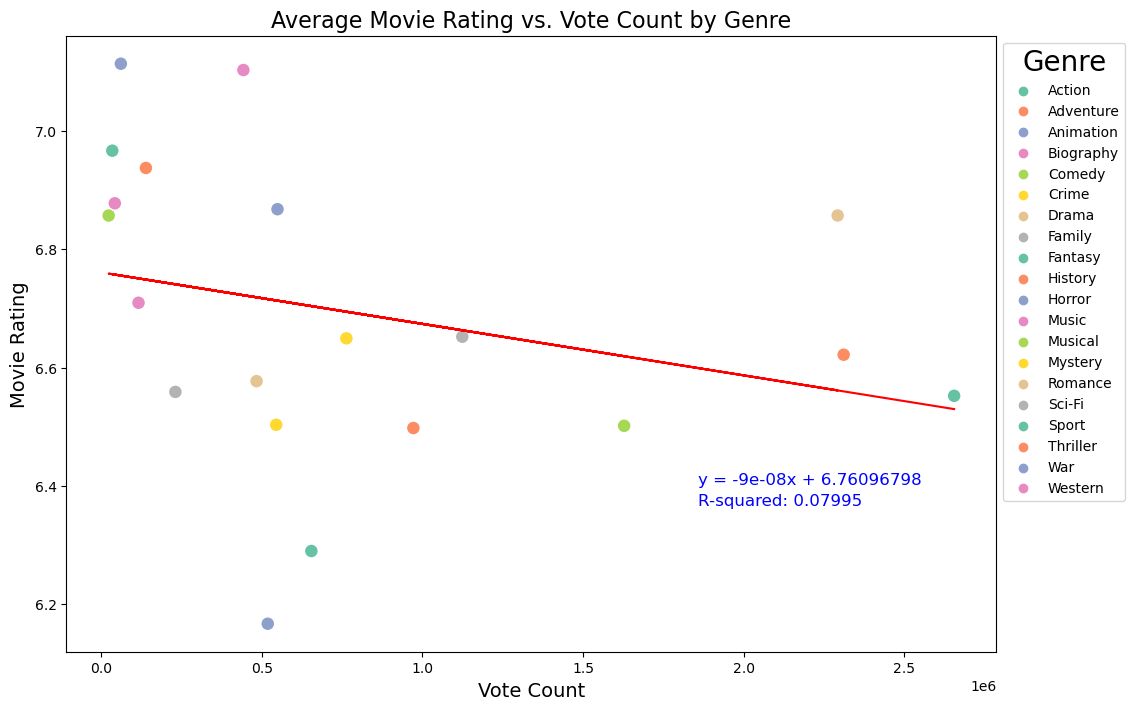

The r-squared is: 0.07995054880960219


In [84]:
# Assuming genre_stats is your DataFrame
genre_stats = pd.DataFrame({
    'Genre': ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
    'Total Votes': [2655091, 2311253, 548907, 442699, 1627939, 763401, 2292478, 231048, 654305, 139348, 518557, 116313, 23433, 544997, 483836, 1124110, 34701, 971881, 61314, 42518],
    'Average Rating': [6.552410, 6.621867, 6.867769, 7.103008, 6.501728, 6.649561, 6.857163, 6.559016, 6.290152, 6.937500, 6.167273, 6.709677, 6.857143, 6.503472, 6.577222, 6.652308, 6.966667, 6.497992, 7.113636, 6.877778],
    'Movie Rating': [8.1, 7.9, 8.2, 7.6, 7.3, 8.0, 7.9, 6.9, 7.7, 7.6, 6.8, 7.2, 8.0, 7.5, 7.0, 8.4, 6.6, 7.5, 7.6, 7.8],
})
# Sample data
votes = genre_stats["Total Votes"]
movie_rating = genre_stats["Average Rating"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(votes, movie_rating)
regress_values = votes * slope + intercept
line_eq = "y = " + str(round(slope, 8)) + "x + " + str(round(intercept, 8))


# Set up the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Votes', y='Average Rating', hue='Genre', data=genre_stats, palette='Set2', s=100, edgecolor='w', linewidth=1)

# Regression line
plt.plot(votes, regress_values, "r-")

# Annotation
plt.annotate(line_eq, (max(votes) * 0.7, max(movie_rating) * 0.9), fontsize=12, color="blue")
plt.text(max(votes) * 0.7
         , max(movie_rating) * 0.895, f"R-squared: {rvalue**2:.5f}", fontsize=12, color="blue")

# Set labels and title
plt.xlabel('Vote Count', fontsize=14)
plt.ylabel('Movie Rating', fontsize=14)
plt.title('Average Movie Rating vs. Vote Count by Genre', fontsize=16)

# Add legend
plt.legend(title='Genre', title_fontsize='20', loc='upper left', bbox_to_anchor=(1, 1))


# Show the plot
plt.show()
print(f"The r-squared is: {rvalue**2}")

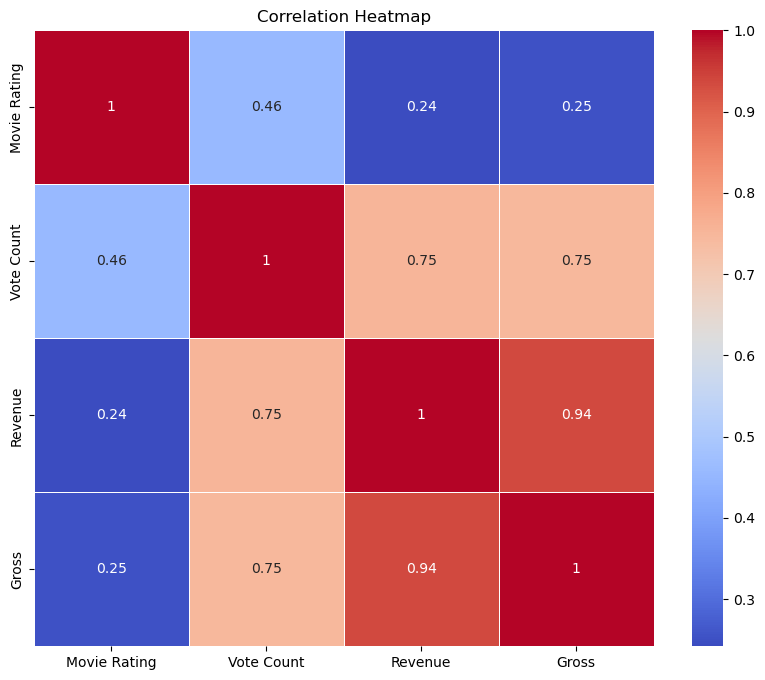

In [85]:
correlation_columns = ['Movie Rating', 'Vote Count', 'Revenue', 'Gross']
heatmap_data = split_data[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

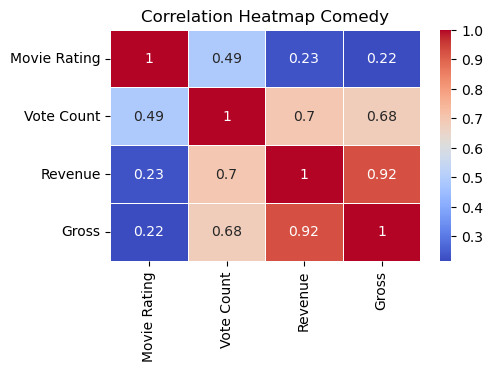

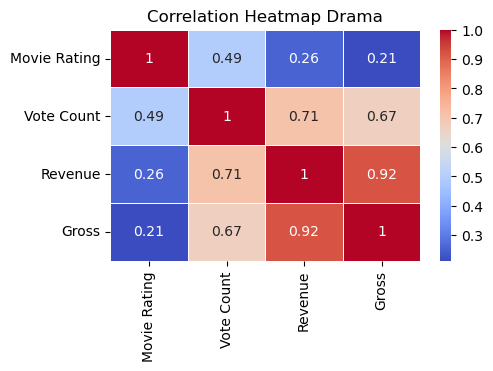

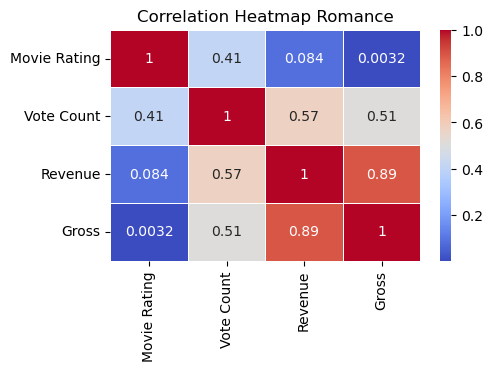

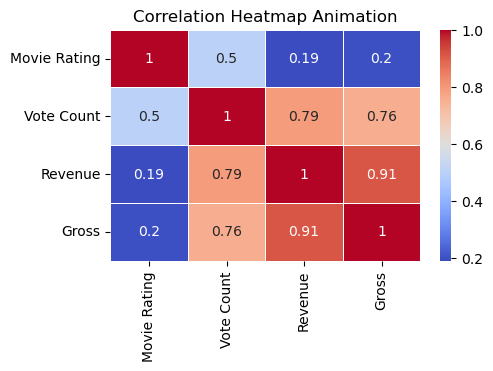

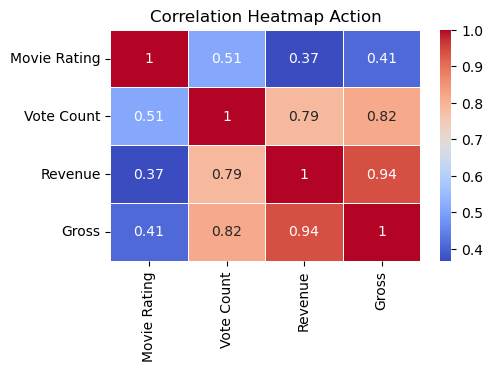

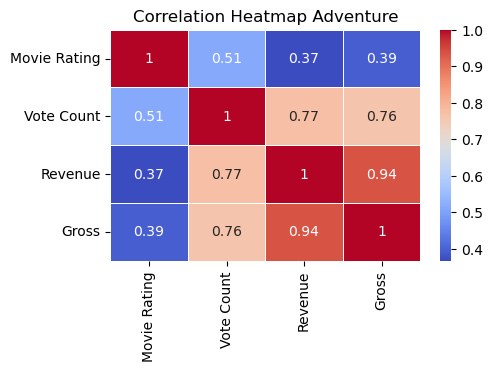

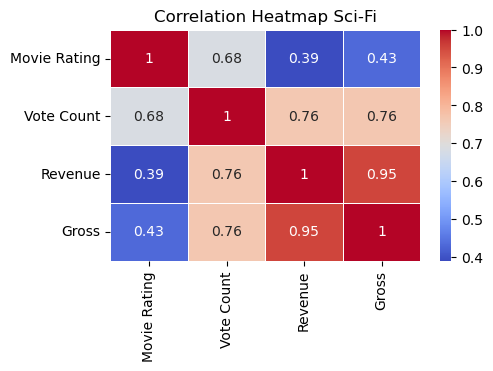

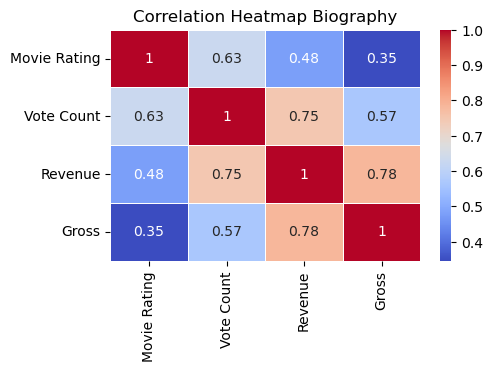

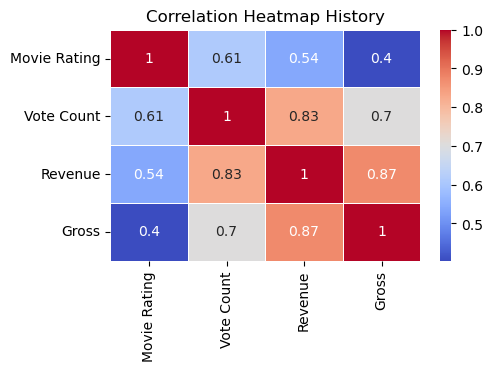

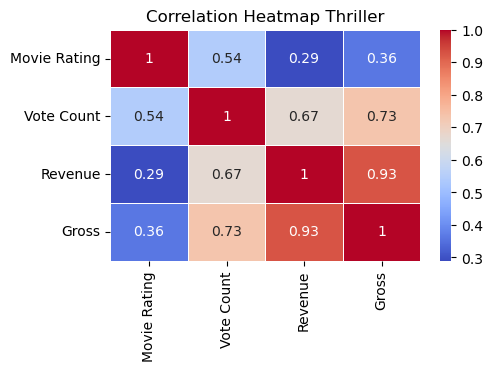

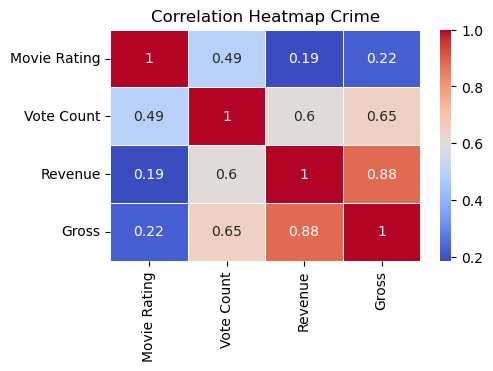

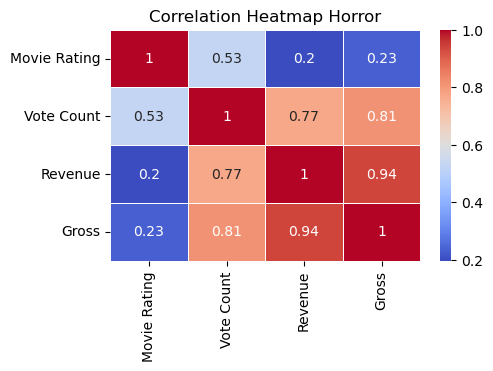

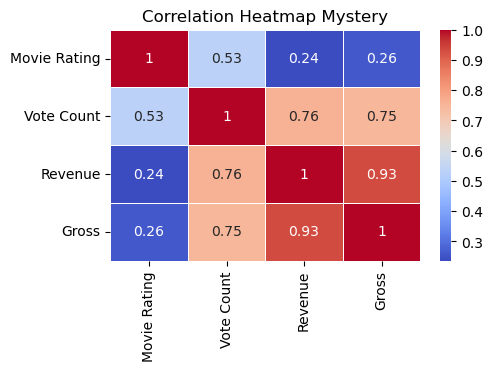

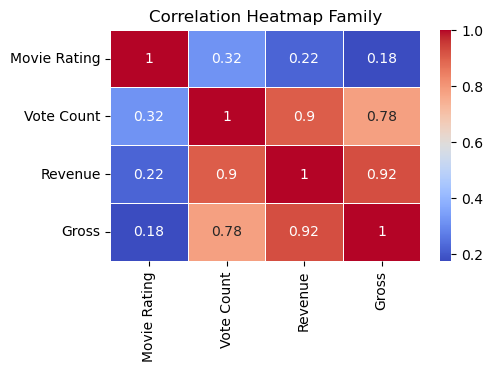

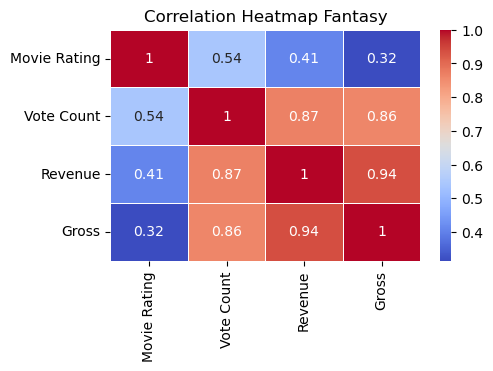

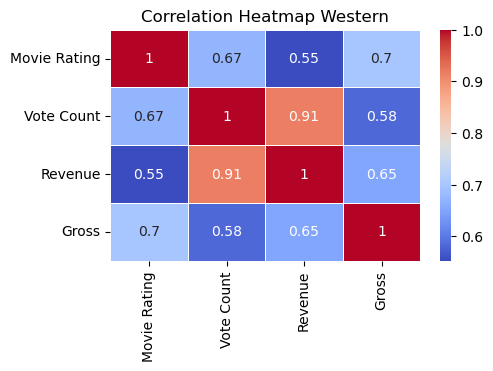

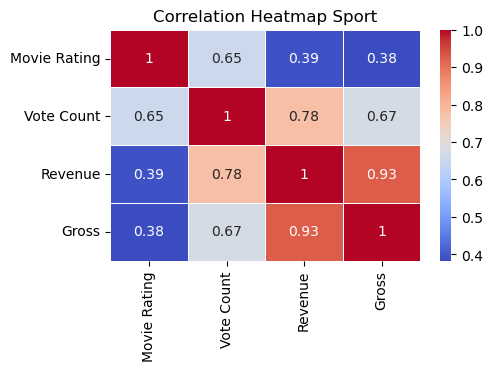

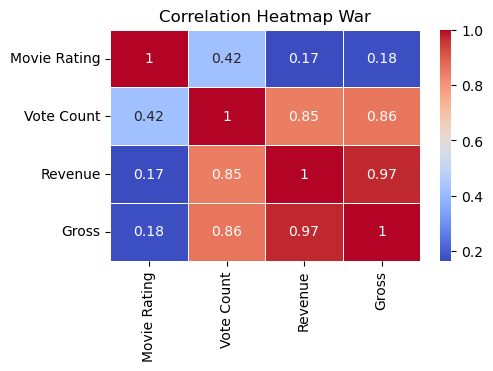

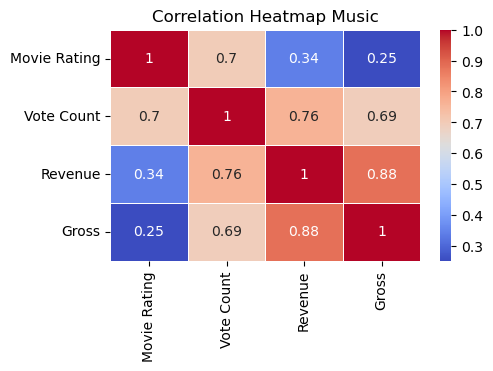

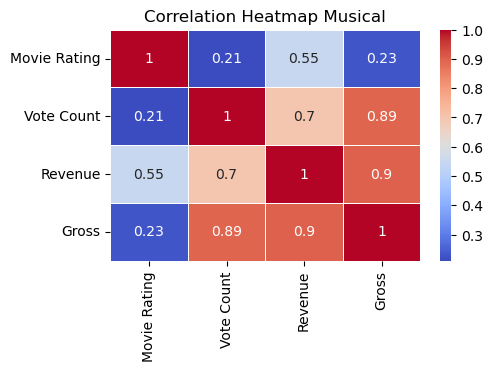

In [86]:
list_genres = list(split_data["Genre"].unique())
correlation_columns = ['Movie Rating', 'Vote Count', 'Revenue', 'Gross']
for genre in list_genres:
    heatmap_data = split_data.loc[split_data["Genre"]==genre][correlation_columns].corr()
#     


    plt.figure(figsize=(5, 3))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Heatmap {genre}')
    plt.show()

In [87]:
correlation_columns = ['Movie Rating', 'Vote Count', 'Revenue', 'Gross']
heatmap_data = split_data[correlation_columns].corr()


/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

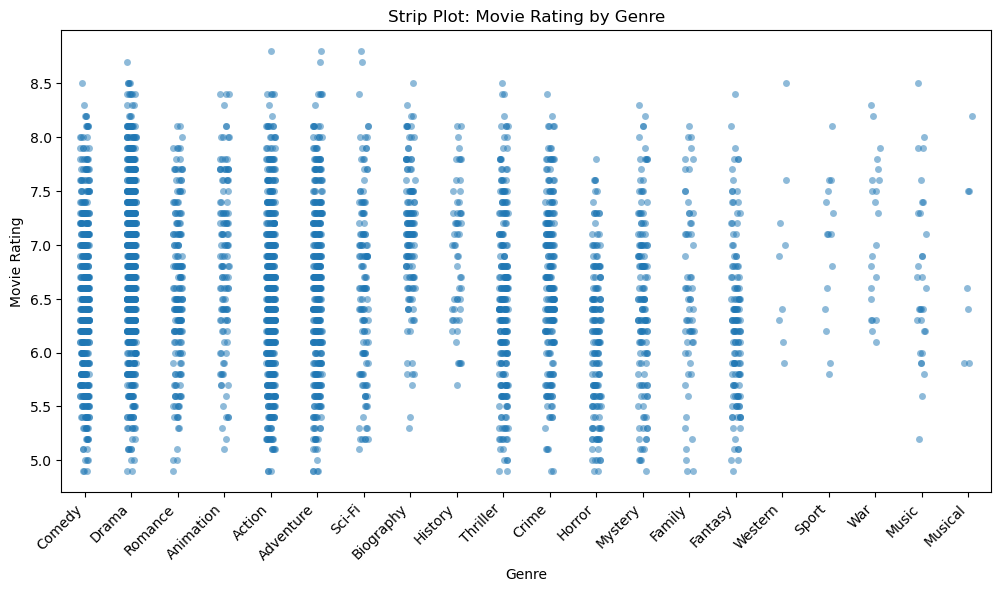

In [88]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='Genre', y='Movie Rating', data=split_data, jitter=True, alpha=0.5)
plt.title('Strip Plot: Movie Rating by Genre')
plt.xticks(rotation=45, ha='right')  # Rotate genre labels for readability
plt.show()

In [89]:
correlation_matrix = stats_df[['Average Rating', 'Movie Count'
                                ]].corr()
print(correlation_matrix)

                Average Rating  Movie Count
Average Rating        1.000000    -0.245348
Movie Count          -0.245348     1.000000


In [90]:
correlation_matrix = split_data[['Movie Rating', 'Vote Count'
                                ]].corr()
print(correlation_matrix)

              Movie Rating  Vote Count
Movie Rating      1.000000    0.455218
Vote Count        0.455218    1.000000


# Correlation coefficient

In many practical situations, a correlation coefficient of 0.4 is useful. If you discovered a 0.4 correlation between a security’s price movements on successive days, you could get rich quickly. A 0.4 correlation between taking a drug and surviving would make the drug valuable.

However one problem is that correlation coefficient is unitless. It tells you the statistical strength of a relation between two variables, but not the practical size. A correlation of 0.4 might be strong statistically, but yield predictions that are too small to be useful in practice.

Another issue is that 0.4 is a long way from one. If you need high confidence to make a decision, such as convicting someone of a criminal offense or authorizing high-risk surgery, a correlation of 0.4 may not be strong enough to justify action.

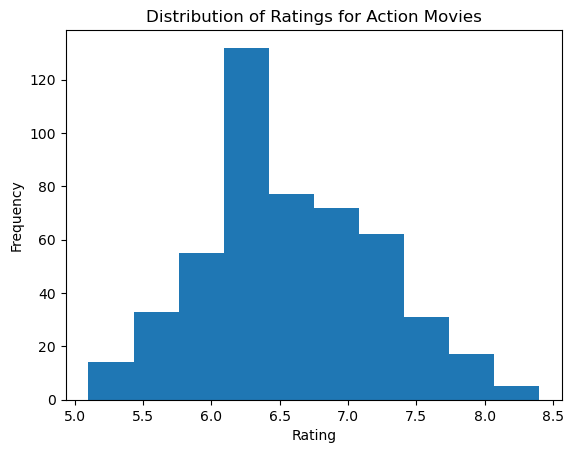

In [91]:
action_ratings = split_data[split_data['Genre'] == 'Action']['Vote Average']
plt.hist(action_ratings)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Action Movies')
plt.show()

In [92]:
split_data

,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Comedy,PG-13,['Garry Marshall']
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Drama,PG-13,['Garry Marshall']
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,Romance,PG-13,['Garry Marshall']
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Animation,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,Action,PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,The Birth of a Nation,6.1,468,['Epoch Film Co.'],11000000,2016.0,6.5,21628.0,15860000.0,History,R,['Nate Parker']
1382,Little Boy,7.2,485,"['Santa Fé Films', 'Metanoia Films']",6485961,2015.0,7.3,23885.0,6420000.0,Drama,PG-13,['Alejandro Monteverde']
1382,Little Boy,7.2,485,"['Santa Fé Films', 'Metanoia Films']",6485961,2015.0,7.3,23885.0,6420000.0,History,PG-13,['Alejandro Monteverde']
1382,Little Boy,7.2,485,"['Santa Fé Films', 'Metanoia Films']",6485961,2015.0,7.3,23885.0,6420000.0,War,PG-13,['Alejandro Monteverde']


In [93]:


from scipy.stats import kruskal
import pandas as pd




split_data = pd.DataFrame(split_data)

# Perform Kruskal-Wallis H test
result = kruskal(*[group["Movie Rating"] for name, group in split_data.groupby("Genre")])

# Print the result
print("Kruskal-Wallis H test:")
print("H-statistic:", result.statistic)
print("P-value:", result.pvalue)

# Interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
    print("The p-value is greater than 0.05,there is no significant evidence to reject the null hypothesis.")
else:
    print("There is significant evidence to reject the null hypothesis.")

Kruskal-Wallis H test:
H-statistic: 267.0364729114236
P-value: 1.0779129521929859e-45
There is significant evidence to reject the null hypothesis.


# Kruskal-Wallis test


This test was used to determine whether there are statistically significant differences between the distributions of movie ratings across different genres. Due to the P-value of >1 we can deduce that there are significant differences between distributions acroos different genres and this is also apparent in our various graphs and charts throughtout the analyses.

Kruskal-Wallis H test:
H-statistic: 267.0364729114236
P-value: 1.0779129521929859e-45
There is significant evidence to reject the null hypothesis.




In [94]:
average_rating_by_year_genre = split_data.groupby(['Year of Release', 'Genre'])['Vote Average'].mean()
average_rating_by_year_genre

Year of Release  Genre    
2010.0           Action       6.557778
                 Adventure    6.775000
                 Animation    7.111111
                 Biography    6.712500
                 Comedy       6.412245
                                ...   
2019.0           Mystery      6.433333
                 Romance      7.261538
                 Sci-Fi       6.475000
                 Thriller     6.818750
                 War          7.500000
Name: Vote Average, Length: 189, dtype: float64